In [1]:
from umap_ import *
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
%matplotlib inline
import seaborn as sns
import umap.umap_ as umap
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import scipy as sp
import networkx as nx
import plotly.graph_objects as go
import math
import plotly
sns.set(style='white', context='poster', rc={'figure.figsize':(10,8)})

In [2]:
from sklearn import datasets
import pandas as pd
from sklearn.preprocessing import StandardScaler
iris = datasets.load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
# Separating out the features
f = df.loc[:, features].values
# Separating out the target
t = df.loc[:,['target']].values
# Standardizing the features
f = StandardScaler().fit_transform(f)

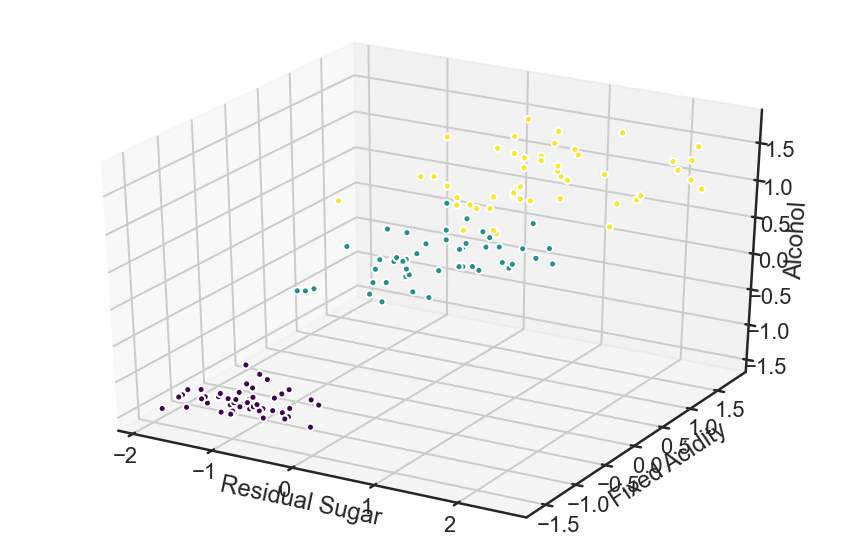

In [20]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

xs = f[:,0]
ys = f[:,2]
zs = f[:,3]
ax.scatter(xs, ys, zs, c= t, cmap = 'viridis', s=50, alpha=1, edgecolors='w')

ax.set_xlabel('Residual Sugar')
ax.set_ylabel('Fixed Acidity')
ax.set_zlabel('Alcohol')

plt.show()

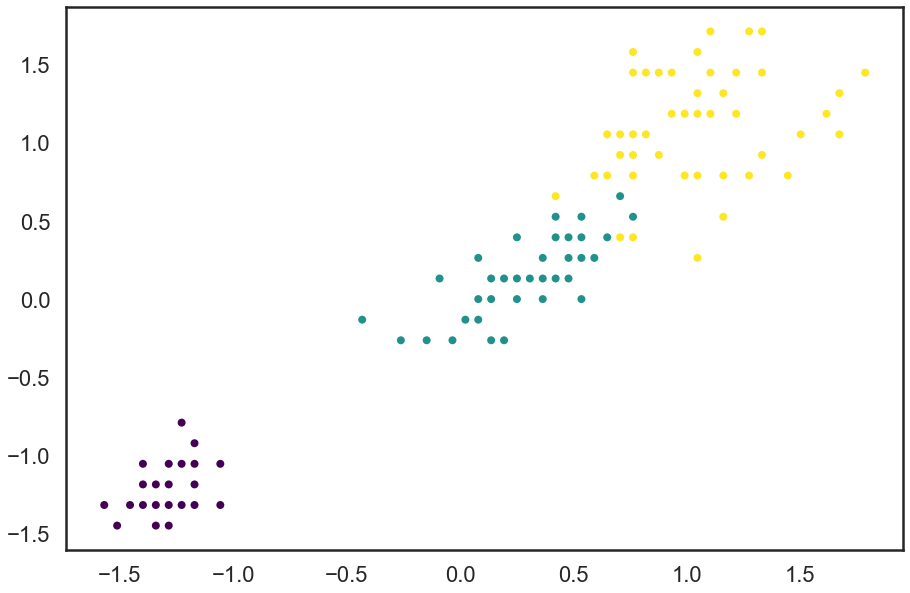

In [23]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)

plt.scatter(f[:,2],f[:,3],c=t,cmap= 'viridis',s=100, alpha=1, edgecolors='w')

In [24]:
knn_indices_i, knn_dists_i, _ = nearest_neighbors(
            f, n_neighbors=15, metric='euclidean', metric_kwds={}, angular='False', random_state=np.random.RandomState(), verbose='False'
        )
sigmas_i, rhos_i = smooth_knn_dist(
        knn_dists_i, float(15), local_connectivity=float(1),
    )

Fri Aug 14 09:17:48 2020 Finding Nearest Neighbors
Fri Aug 14 09:17:48 2020 Building RP forest with 6 trees
Fri Aug 14 09:17:50 2020 NN descent for 7 iterations
	 0  /  7
	 1  /  7
	 2  /  7
Fri Aug 14 09:17:58 2020 Finished Nearest Neighbor Search


In [66]:
radii_iris = []
for i in range(len(sigmas_i)):
    radii_iris.append((max(knn_dists_i[i])))
#dcolor_iris = set(radii_iris)
#dcolor_iris
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dcolor_iris = le.fit_transform(radii_iris)
dcolor_iris

array([  6,  51,  10,  14,  12, 111,  33,   3,  81,  43,  39,  11,  30,
       103, 134, 141, 111,   1, 110,  69,  50,  25,  86,  29,  20,  78,
         7,   8,   9,   5,  17,  59, 125, 137,  37,  15,  64,  21,  72,
         0,   4, 140,  49,  32,  82,  47,  68,  13,  18,   2, 112,  74,
        93, 108,  46,  19, 101, 131,  67,  96, 138,  27, 124,  23,  75,
        98,  66,  73, 128,  88, 102,  34, 104,  31,  52,  60, 100,  41,
        16,  90,  85,  92,  58,  54,  95, 121,  79, 122,  77,  84,  76,
        28,  62, 132,  48,  56,  24,  38, 123,  22, 115,  87,  80,  36,
        45, 133, 129, 120, 119, 135,  53,  69,  42, 118, 116,  52,  55,
       142, 139, 127,  89, 107, 136,  70,  71, 109,  35,  65,  91, 113,
       126, 143,  97,  26, 106, 130, 117,  57,  63,  44,  58,  94,  87,
        83,  99,  61, 105,  40, 114,  56], dtype=int64)

In [59]:
knn_max =[]
for i in range(len(sigmas_i)):
    knn_max.append((max(knn_dists_i[i])))
dcolor_iris = set(knn_max)
dcolor_iris

{0.4794521359945751,
 0.4822029964889754,
 0.4939340943411754,
 0.49719350624359154,
 0.5068459943072192,
 0.5068459943072193,
 0.507606193331884,
 0.5149324708923145,
 0.5202776336679772,
 0.5202776336679773,
 0.5233730115255364,
 0.53255120738553,
 0.535345061447417,
 0.5366710799327514,
 0.539562312934928,
 0.5485779984913925,
 0.5532824269586671,
 0.5630021619185501,
 0.5640443251865954,
 0.5698536803483992,
 0.5856121661520796,
 0.5858561572241522,
 0.5896099345722488,
 0.590029836684992,
 0.597421055833414,
 0.597510713399378,
 0.6072710889628825,
 0.6107078357042087,
 0.6164116263414191,
 0.6288951561854805,
 0.6293772784107076,
 0.6297559881818555,
 0.6465478415765844,
 0.6480986590729644,
 0.6484692163421985,
 0.6491698214357373,
 0.6492470869524914,
 0.6579922828459397,
 0.6579922828459398,
 0.663769084043065,
 0.6638053654004721,
 0.6638053654004725,
 0.6708942861043771,
 0.6710297133703148,
 0.676288744287257,
 0.6808217022043035,
 0.6813190750084571,
 0.6822198225966555,
 

In [70]:
from matplotlib.patches import Circle

def draw_circle(position, radius,
                        ax=None, from_size=0.1, to_size=0.5, n_ellipses=3,
                        alpha=1, color=None,
                        **kwargs):
    ax = ax or plt.gca()
    # Draw the Ellipse
    for nsig in np.linspace(from_size, to_size, n_ellipses):
        ax.add_patch(Circle(position, nsig * radius, alpha=alpha, lw=1, color=color, **kwargs))

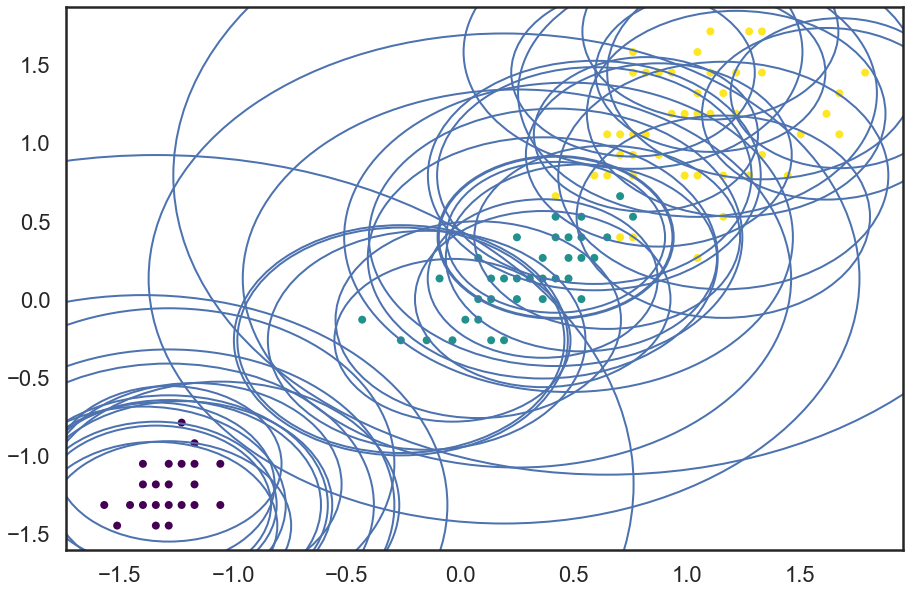

In [79]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)

for i in range(0,len(sigmas_i)/2):
    circle = plt.Circle((f[i,2], f[i,3]), max(knn_dists_i[i]),fill=False, color ='b')
    ax.add_artist(circle)

ax.scatter(f[:,2],f[:,3],
           c=t, cmap= 'viridis',
           s=100, alpha=1, edgecolors='w')

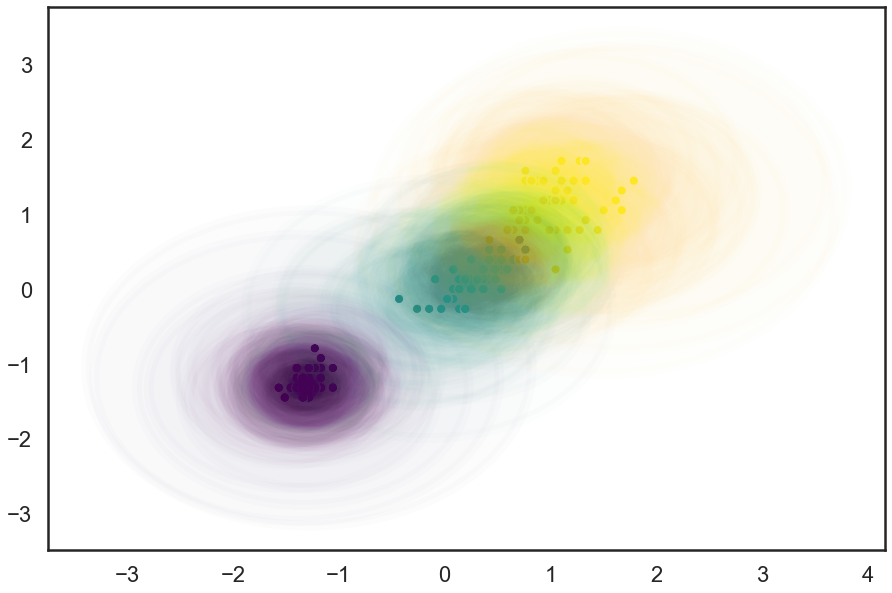

In [50]:
#W.R.T The Cluster
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
colors = plt.get_cmap('viridis')(np.linspace(0, 1, 3))
for i in range(len(sigmas_i)):
    pos = f[i, 2:4]
    draw_circle(pos, max(knn_dists_i[i]),
                        ax, color=colors[int(t[i])],
                        from_size=0.2, to_size=1.0, alpha=0.01)

ax.scatter(f[:,2],f[:,3],
           c=t, cmap= 'viridis',
           s=100, alpha=1, edgecolors='w')

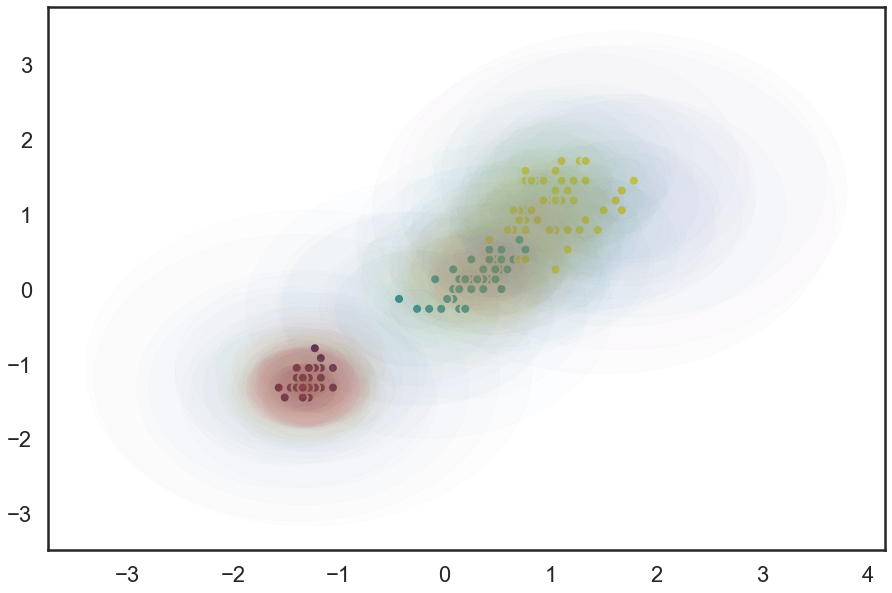

In [72]:
#W.R.T Radius
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
colors = plt.get_cmap('Spectral')(np.linspace(0, 1, max(dcolor_iris)+1))
for i in range(len(sigmas_i)):
    pos = f[i,2:4]
    draw_circle(pos, max(knn_dists_i[i]),
                        ax, color=colors[dcolor_iris[i]],
                        from_size=0.2, to_size=1.0, alpha=0.01)
ax.scatter(f[:,2],f[:,3],
           c=t, cmap= 'viridis',
           s=100, alpha=1, edgecolors='w')

In [56]:
radii_iris

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 2,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 2,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0]